In [2]:
import torch
import torch.nn as nn
from torchvision.datasets import CIFAR10
import os

In [3]:
import matplotlib.pyplot as plt
import torchvision.transforms as T
import numpy as np
plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams["figure.figsize"] = (20,3)
plt.rcParams["figure.dpi"] = 224


def show(imgs):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = T.ToPILImage()(img.to('cpu'))
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])


In [3]:
os.getcwd()
torch.manual_seed(0xDEAD)

cwd = '/home/stankvla/Projects/Python/PytorchExamples/ComputerVision/EfficientNet_image_classification'

In [4]:
cifar10_train = CIFAR10(os.path.join(cwd, 'train'), download=True)
cifar10_test = CIFAR10(os.path.join(cwd, 'test'), train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
len(cifar10_train), len(cifar10_test)

(50000, 10000)

In [7]:
policy = T.AutoAugmentPolicy.CIFAR10
tr = T.AutoAugment(policy)
ds = CIFAR10(os.path.join(cwd, 'train'), transform=tr)

In [8]:
ds[0]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FE5A339D278>, 6)

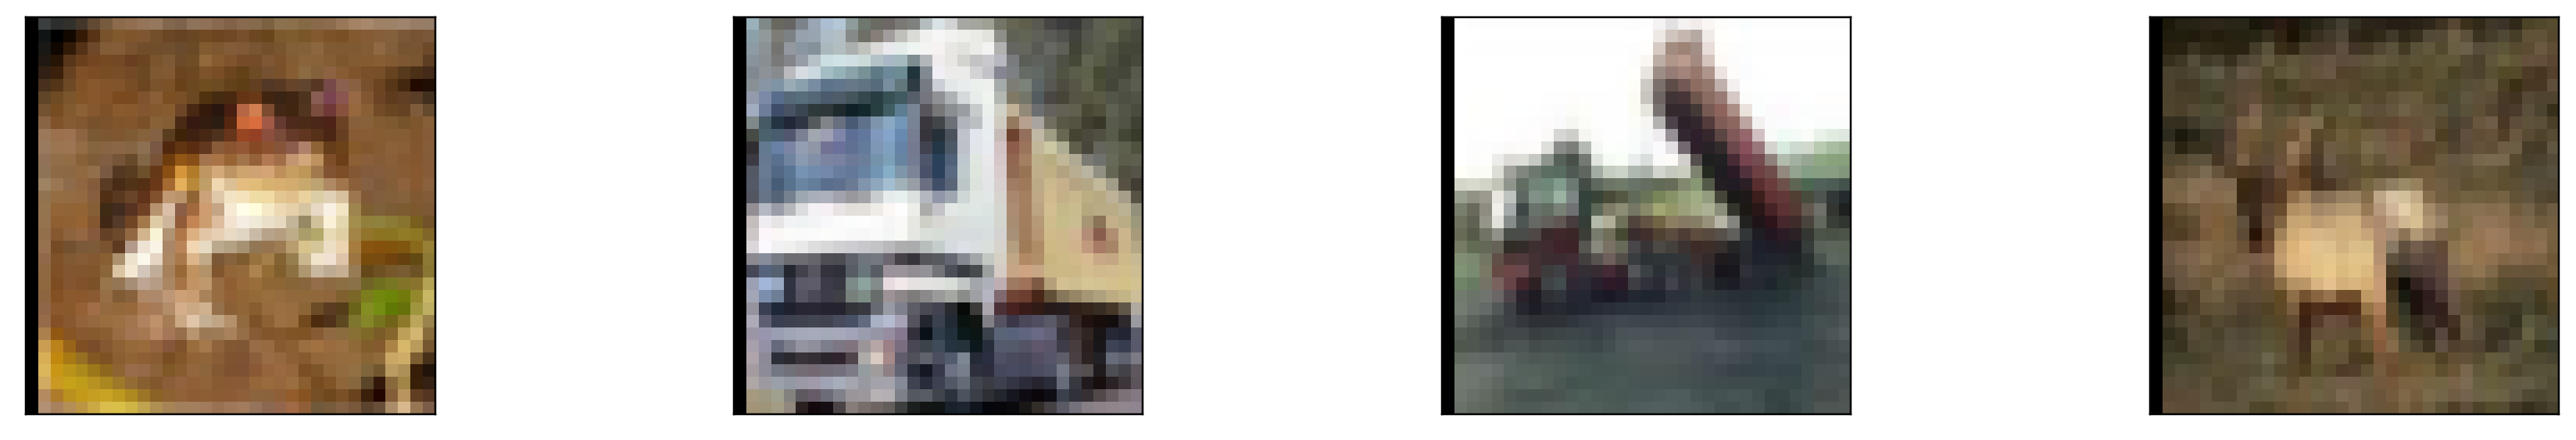

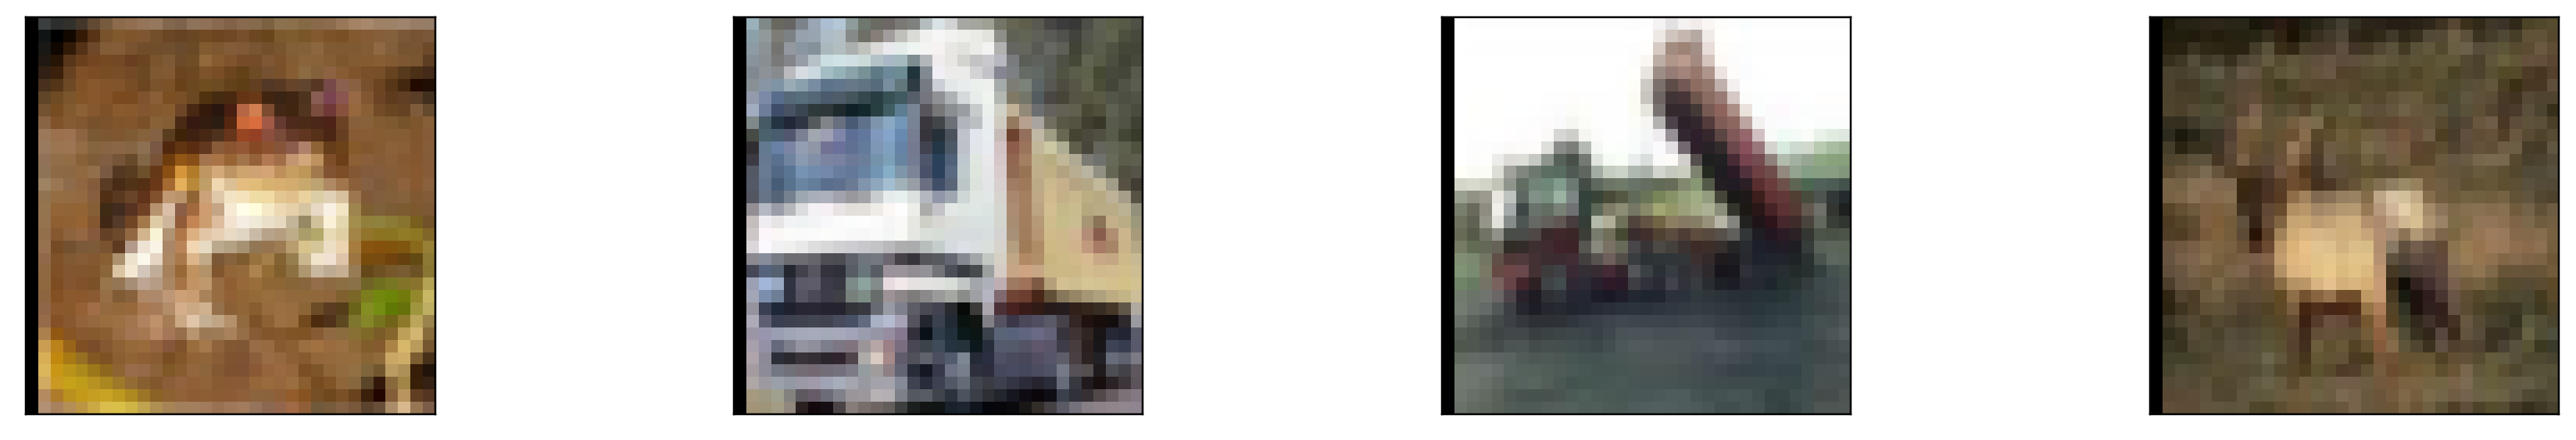

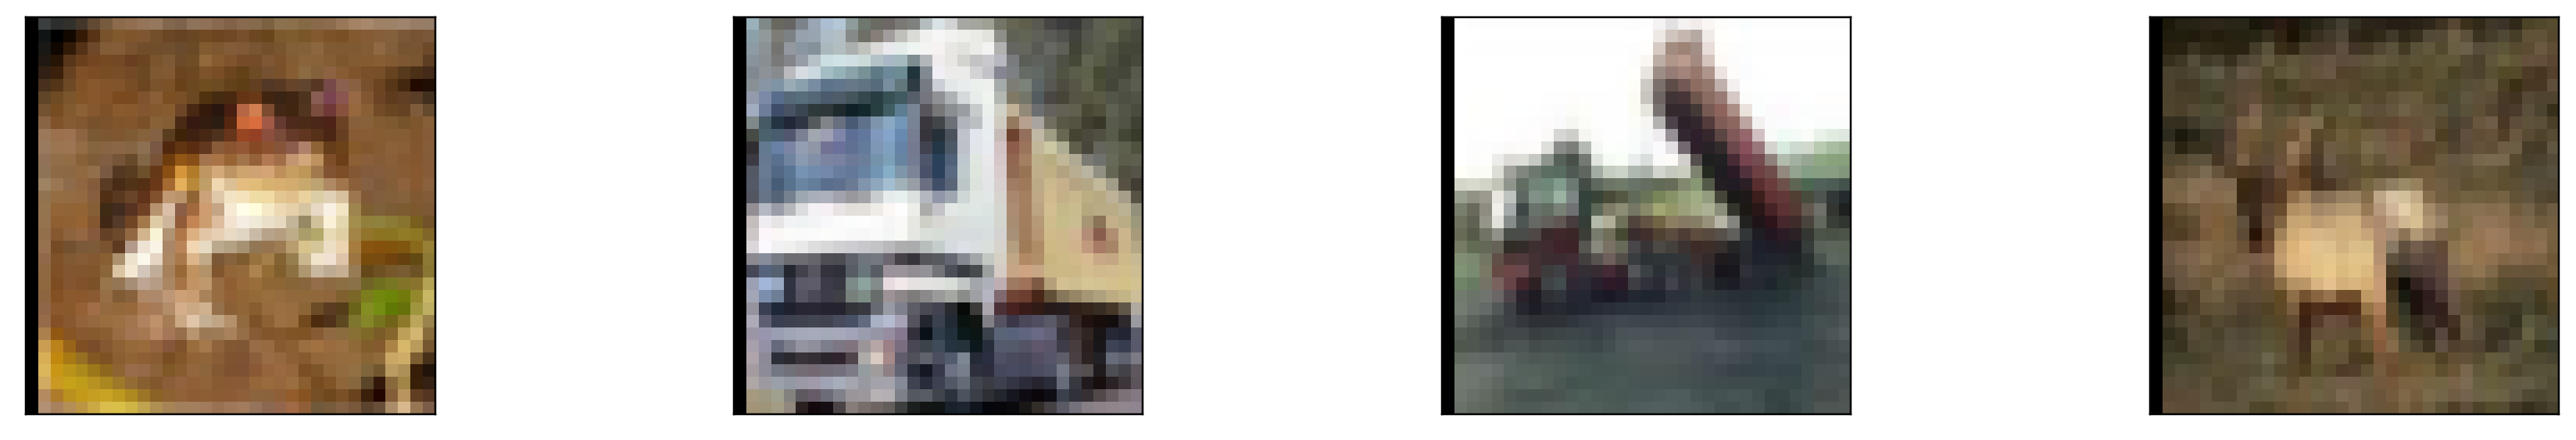

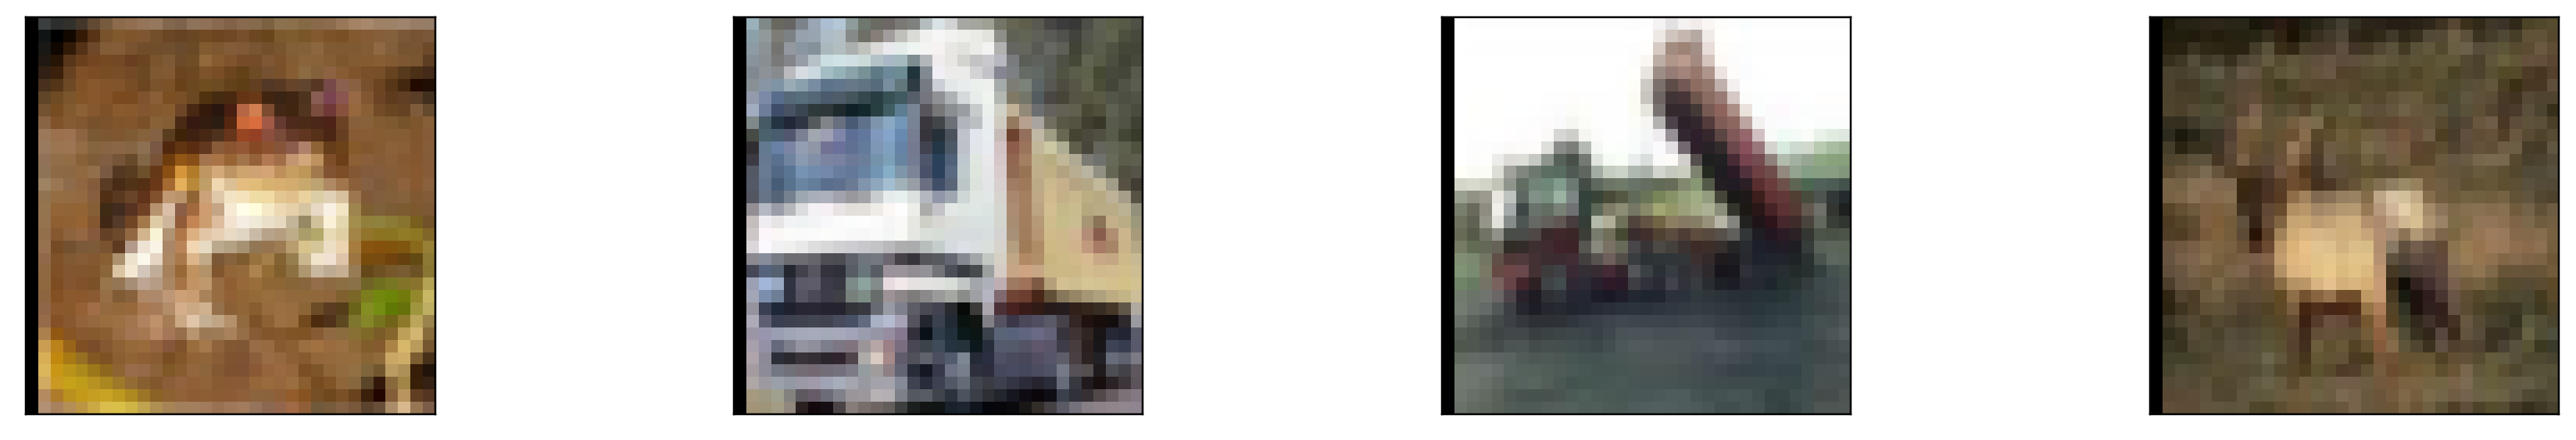

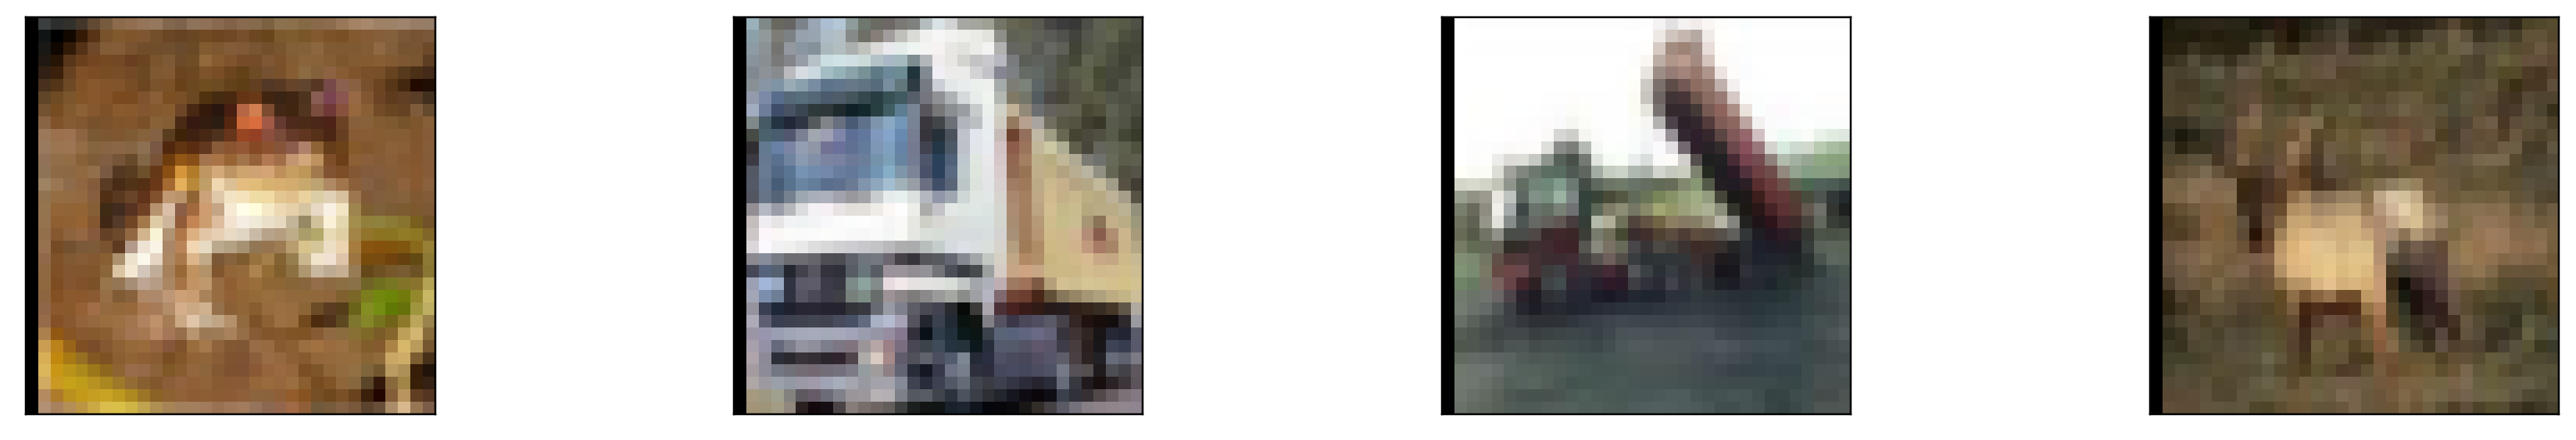

In [62]:
to_tensor_tr = T.ToTensor()
new_resolution = 32
for new_resolution in [32, 64, 128, 256, 512]:
    jit_transforms = nn.Sequential(
        # T.RandomEqualize(p=1),
        # T.RandomPosterize(7, p=1),
        T.Resize(new_resolution),
        T.RandomApply(nn.ModuleList([
            T.RandomResizedCrop(new_resolution, scale=(0.7, 1.0)),
            T.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.01),
            T.RandomAdjustSharpness(sharpness_factor=5), # todo extend []

            T.RandomErasing(value='random'),

            T.RandomRotation((-20, 20)),
            T.RandomPerspective(distortion_scale=0.2),
            T.RandomHorizontalFlip(),
        ]))
    )
    cnt = 4
    imgs_tran = []
    imgs_orig = []
    for i, (img, label) in enumerate(cifar10_train):
        if i == cnt:
            break
        t_img = to_tensor_tr(img)
        imgs_orig.append(t_img)
        imgs_tran.append(jit_transforms(t_img))
    # show(imgs_tran)
    show(imgs_orig)

In [51]:
x1 = 0.256
x2 = 0.256
factor = 0.97
xs1 = []
xs2 = []
for i in range(4000):
    if i % 24 == 0:
        x1*= factor
    if i % 20 == 0:
        x2 *= 0.975
    if i % 10 == 0:
        # x2 *= 0.98745
        xs1.append(x1)
        xs2.append(x2)
    

In [16]:
xs

[0.24831999999999999,
 0.24831999999999999,
 0.24831999999999999,
 0.24087039999999998,
 0.24087039999999998,
 0.23364428799999998,
 0.23364428799999998,
 0.23364428799999998,
 0.22663495935999997,
 0.22663495935999997,
 0.21983591057919996,
 0.21983591057919996,
 0.21324083326182397,
 0.21324083326182397,
 0.21324083326182397,
 0.20684360826396925,
 0.20684360826396925,
 0.20063830001605015,
 0.20063830001605015,
 0.20063830001605015,
 0.19461915101556865,
 0.19461915101556865,
 0.18878057648510158,
 0.18878057648510158,
 0.18311715919054852,
 0.18311715919054852,
 0.18311715919054852,
 0.17762364441483205,
 0.17762364441483205,
 0.17229493508238708,
 0.17229493508238708,
 0.17229493508238708,
 0.16712608702991547,
 0.16712608702991547,
 0.162112304419018,
 0.162112304419018,
 0.15724893528644746,
 0.15724893528644746,
 0.15724893528644746,
 0.15253146722785402,
 0.15253146722785402,
 0.1479555232110184,
 0.1479555232110184,
 0.1479555232110184,
 0.14351685751468785,
 0.14351685751468

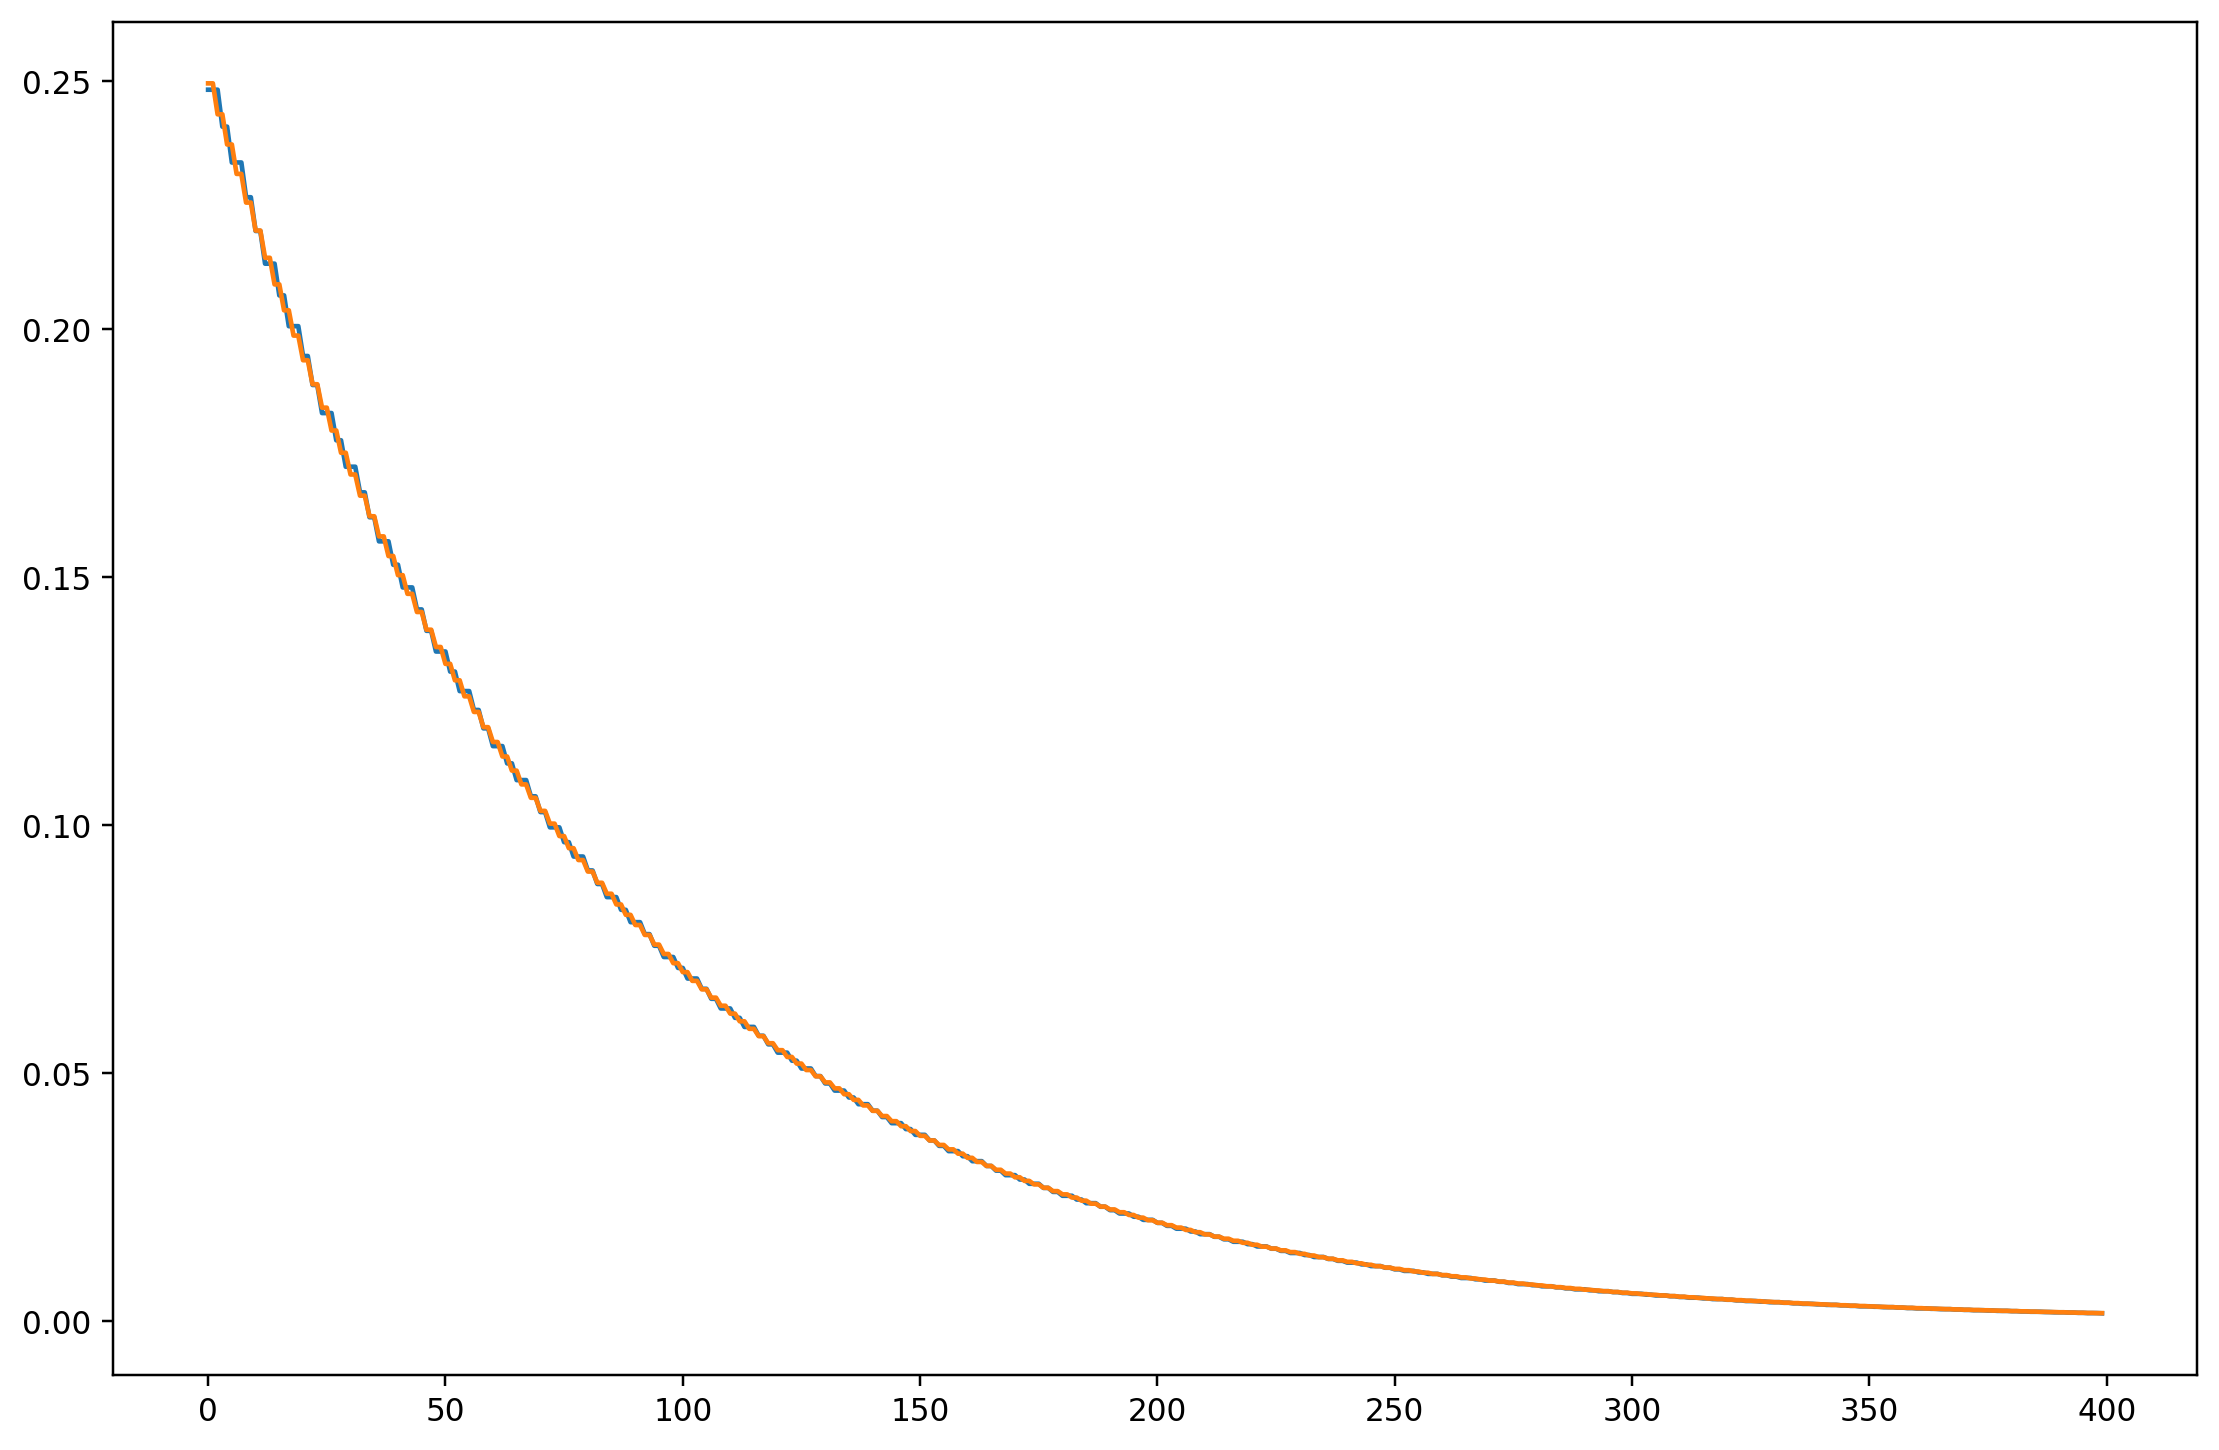

In [52]:
plt.rcParams["figure.figsize"] = (12,8)
# original = [for x in xs]
plt.plot(range(len(xs1)), xs1)
plt.plot(range(len(xs2)), xs2)

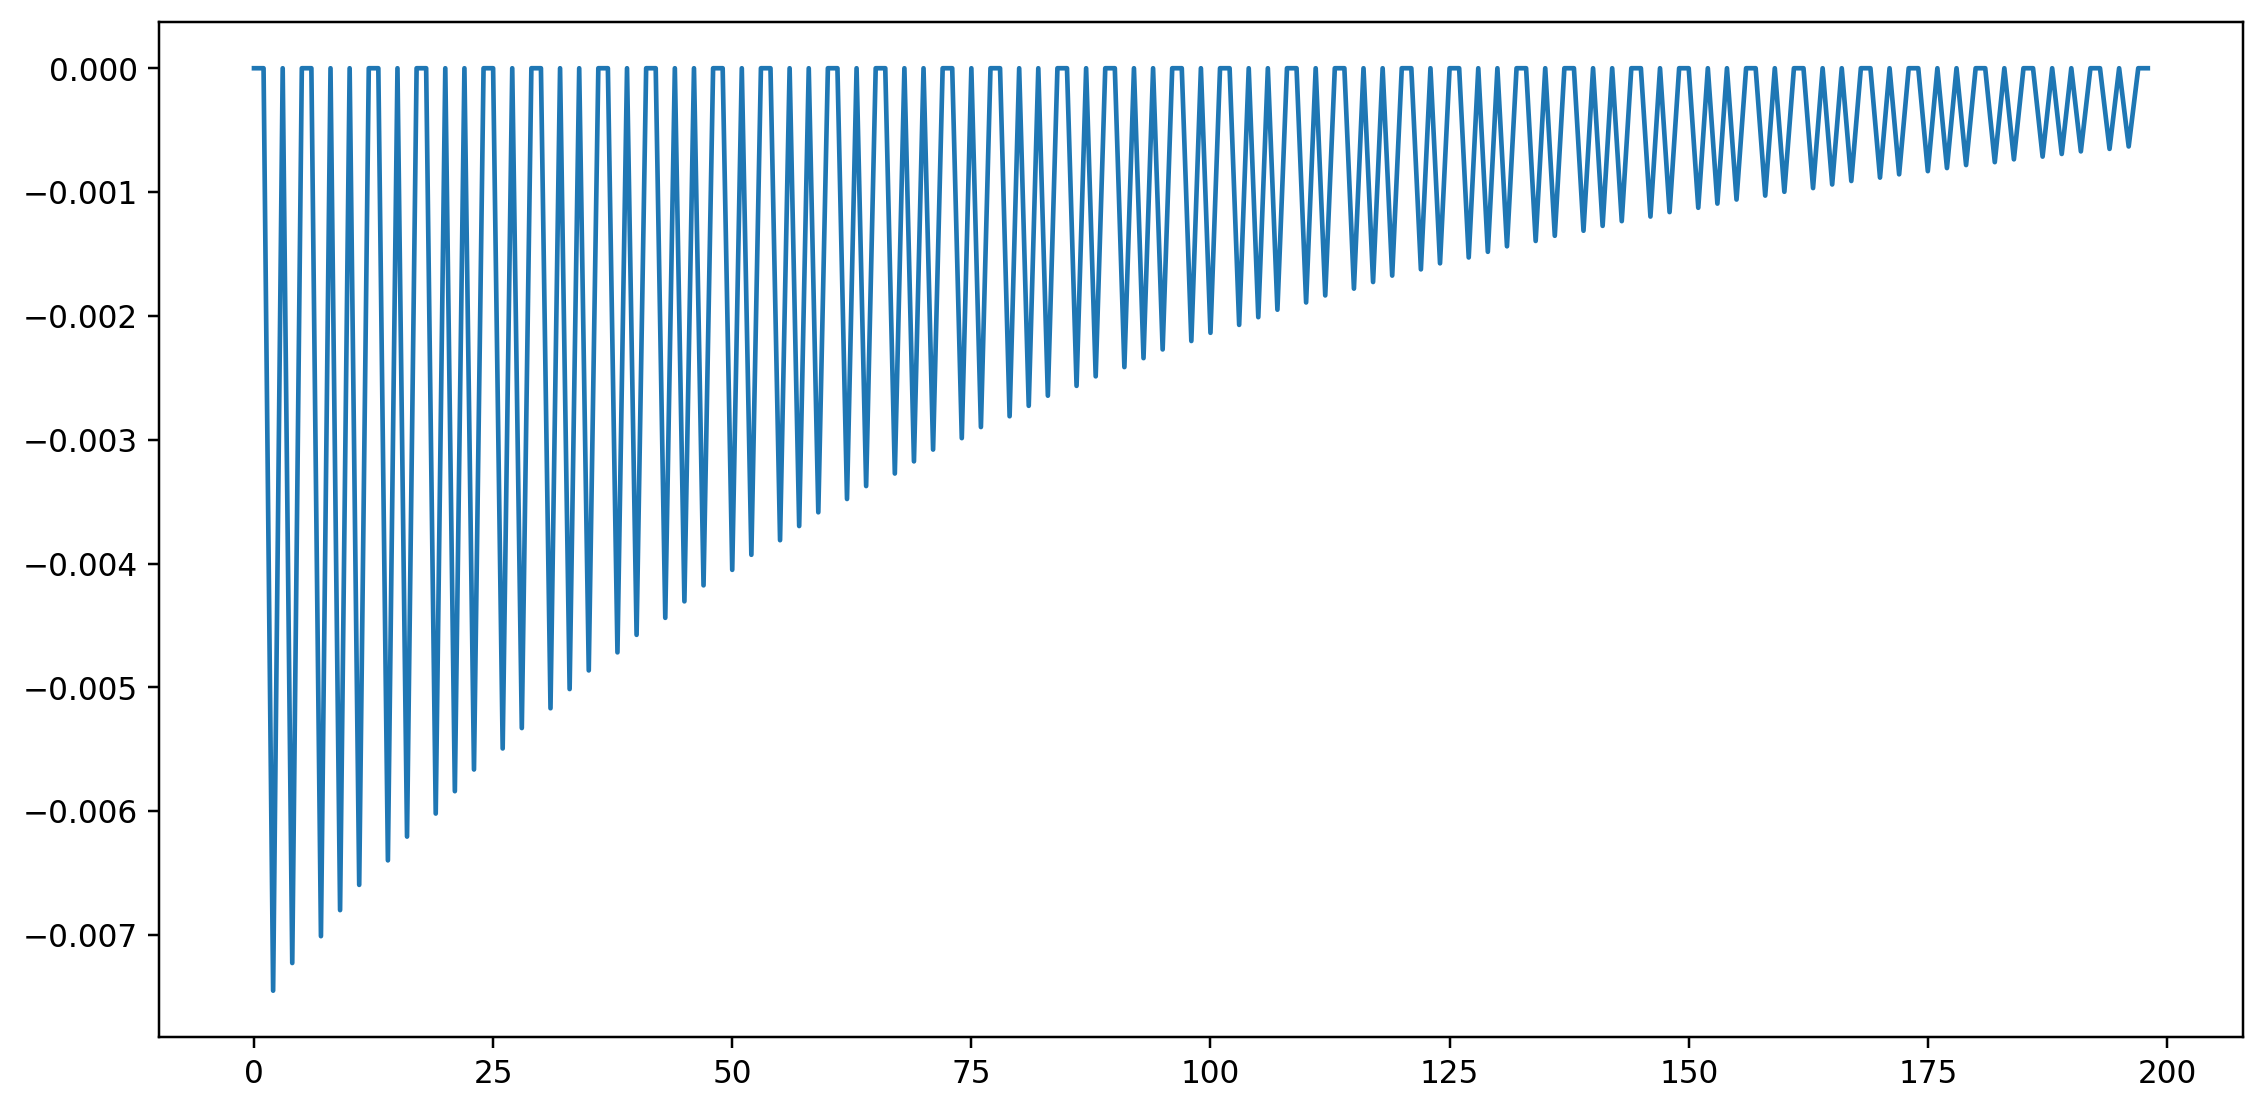

In [21]:
diffs = [y-x for x, y in zip(xs[:-1], xs[1:])]
plt.plot(range(len(diffs)), diffs)